<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/NLP_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State of the Art Sentiment Analysis using LSTM
### Deep Learning: Natural Language Processing

> Semant Jain, PhD
> semant@gmail.com

### Executive Summary
> Unlike purely feedforward neural networks, long short-term memory models (LSTM) have feedback connections. Used in deep learning, this artificial recurrent neural network (RNN) architecture can process images, speech, video, handwriting, speech, anomalies in network traffic / intrusion detection system. A LSTM unit consists of a cell, an input gate, an output gate, and a forget gate. 

> As there are lags of unknown duration between important events in a time series data, LSTMs are well suited to classifying, procesing, and making predictions on those data points. This insenstivity to gap length is an important advantage of LSTMs over RNNS, hidden Markov models, and other sequence learning methods.

> This project demonstrates the use of LSTM for Sentiment analysis. This key applications of natural language processing has been used extensively in Netflix, YouTube, Google search, and Uber Eats amongst other industries. I have used sentiment analysis to gauge the mood of capital market participants on medium such as Seeking Alpha, Market Watch, Wall Street Journal, Bloomberg, and other financial news media. As text is the most complex of unstructured data, before it be processed, it needs noise removal (deletion of stopping words and commonly occuring words) and lexicon normalization (stemming, Lemmatization). 

> This project uses a public dataset - IMDB - which houses movie reviews to train a one layer LSTM for analyzing the positive or negative sentiment of a movie review. Even on a Macbook, the training was completed in under an hour and achieved an accuracy over 98%. Sample movie reviews were visualized through word clouds and tested for classification.


### Contents
+ Setting up
+ Model Architecture 1
+ Model Architecture 2
+ Visualization

### Libraries
+ Keras
+ Matplotlib
+ Numpy
+ Wordcloud

# 1. Setting up

### Importing Libraries

In [0]:
#!pip3 install wordcloud

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import imdb
from keras.layers import Conv1D, Dense, LSTM, MaxPool1D
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.preprocessing import sequence

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Loading Data

In [0]:
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = top_words)

In [0]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
#print(x_train[0])

(25000,) (25000,)
(25000,) (25000,)


### Dictionaries

In [0]:
dict_w2n = imdb.get_word_index()
dict_n2w = { n:w for (w, n) in dict_w2n.items() } 

### Sample Reviews

In [0]:
dict_n2w = { n+3:w for (w, n) in dict_w2n.items() } 

r1 = x_train[0]
review = [ dict_n2w.get(i) for i in r1]
#print(review)

### Fixing Review Length

In [0]:
max_review_length = 500
X_train = sequence.pad_sequences(x_train, maxlen = max_review_length)
X_test  = sequence.pad_sequences(x_test,  maxlen = max_review_length)

print(X_train.shape, X_test.shape)
#print(X_train[0])

(25000, 500) (25000, 500)


# 2. Model Architecture 1

### Architecture

In [0]:
embedding_vector_length = 32

model = Sequential()

model.add(Embedding(top_words, embedding_vector_length, input_length = max_review_length ))

model.add(LSTM(100))

# Binary classification: Positive or Negative review, so, "1"
model.add(Dense(1, activation = 'sigmoid')) 

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


### Model Fit

In [0]:
model.fit(X_train, y_train, 
          epochs = 5, 
          batch_size = 64)

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
25000/25000 [==============================] - 282s 11ms/step - loss: 0.4911 - accuracy: 0.7549
Epoch 2/5
25000/25000 [==============================] - 253s 10ms/step - loss: 0.3117 - accuracy: 0.8756
Epoch 3/5
25000/25000 [==============================] - 265s 11ms/step - loss: 0.2514 - accuracy: 0.9034
Epoch 4/5
25000/25000 [==============================] - 290s 12ms/step - loss: 0.2188 - accuracy: 0.9148
Epoch 5/5
25000/25000 [==============================] - 281s 11ms/step - loss: 0.1987 - accuracy: 0.9269


### Sample Test
**Test reviews**
+ Reviews are all in small caps and without punctuation

In [0]:
revPos = "the movie was great and just brilliant cast was great story was interesting"
revNeg = "the movie was the worst and just boring cast was bad"

array([[0.78081393]], dtype=float32)

**Helper function**

In [0]:
def ReviewType(soft):
    if soft > 0.5:
        return "Positive review"
    else:
        return "Negative review"

**Fit: Positive review**

In [0]:
rev2 = revPos.split()
rev3 = [ dict_w2n.get(w)+3 for w in rev2] # +3 shifts indexes
rev4 = [0] * (500 - len(rev3) - 1) + [1] + rev3 
#print(rev4)
rev5 = np.array(rev4).reshape(1, -1)
print(ReviewType(model.predict(rev5)[0][0]))

Positive review


**Fit: Negative review**

In [0]:
rev2 = revNeg.split()
rev3 = [ dict_w2n.get(w)+3 for w in rev2] # +3 shifts indexes
rev4 = [0] * (500 - len(rev3) - 1) + [1] + rev3 
#print(rev4)
rev5 = np.array(rev4).reshape(1, -1)
print(ReviewType(model.predict(rev5)[0][0]))

Negative review


# 3. Architecture 2

### Model Compile

In [0]:
embedding_vector_length = 32
max_review_length = 500

model = Sequential()
model.add(Embedding(top_words, 
                    embedding_vector_length,
                   input_length = max_review_length )) 

model.add(Conv1D(filters = 32, kernel_size = 3, padding = "same", activation = 'relu'))

model.add(MaxPool1D(pool_size = 2)) 

model.add(LSTM(100, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_________________________________________________________________
None


### Model fit

In [0]:
history = model.fit(X_train, y_train, 
          epochs = 20, 
          batch_size = 64)

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/20
25000/25000 [==============================] - 146s 6ms/step - loss: 0.4616 - accuracy: 0.7695
Epoch 2/20
25000/25000 [==============================] - 151s 6ms/step - loss: 0.3046 - accuracy: 0.8747
Epoch 3/20
25000/25000 [==============================] - 143s 6ms/step - loss: 0.2694 - accuracy: 0.8919
Epoch 4/20
25000/25000 [==============================] - 145s 6ms/step - loss: 0.2469 - accuracy: 0.9038
Epoch 5/20
25000/25000 [==============================] - 146s 6ms/step - loss: 0.2160 - accuracy: 0.9153
Epoch 6/20
25000/25000 [==============================] - 138s 6ms/step - loss: 0.1936 - accuracy: 0.9279
Epoch 7/20
25000/25000 [==============================] - 151s 6ms/step - loss: 0.1703 - accuracy: 0.9357
Epoch 8/20
25000/25000 [==============================] - 140s 6ms/step - loss: 0.1675 - accuracy: 0.9380
Epoch 9/20
25000/25000 [==============================] - 149s 6ms/step - loss: 0.1430 - accuracy: 0.9465
Epoch 10/20
25000/25000 [=====================

### Sample review: Test

# 4. Visualization

### Accuracy change

dict_keys(['loss', 'accuracy'])


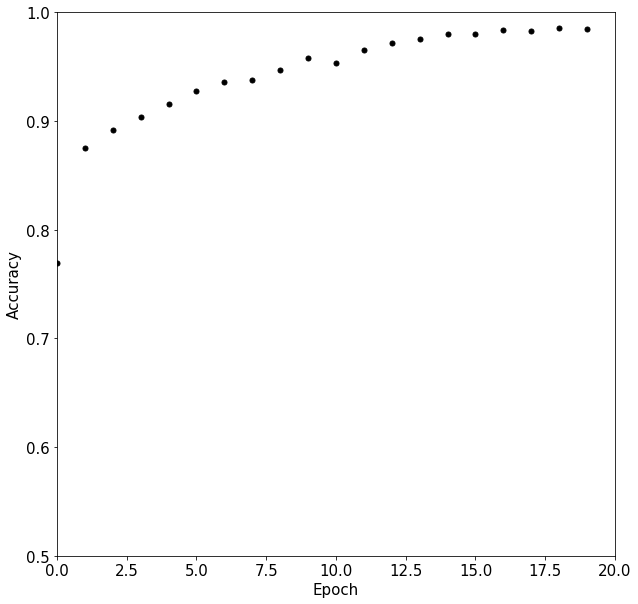

Change in accuracy over epochs: 0.7699999809265137 to 0.9800000190734863


In [0]:
print(history.history.keys())

plt.figure(figsize = (10,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(0, 20)
plt.ylim(0.5, 1.0)
plt.xlabel("Epoch", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
# Plot training & validation accuracy values
#plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['accuracy'], 'k.', markersize = 10)
#plt.title('Model accuracy')
#plt.legend(['Accuracy'], loc='lower right')
plt.savefig("CE_ML_Project_11_01_Accuracy.jpeg")
plt.show()

v1 = round(history.history['loss'][0], 2)
v2 = round(history.history['loss'][-1], 2)
v3 = round(history.history['accuracy'][0], 2)
v4 = round(history.history['accuracy'][-1], 2)

#print(f"Change in loss over epochs: {round(v1, 2)} to {round(v1, 2)}")
print(f"Change in accuracy over epochs: {v3} to {v4}")

### Word clouds

In [0]:
revPos = "the movie was awesome and just superb stars were beautiful location was so pretty i loved it"
revNeg = "the movie was the worst and just boring cast was bad"

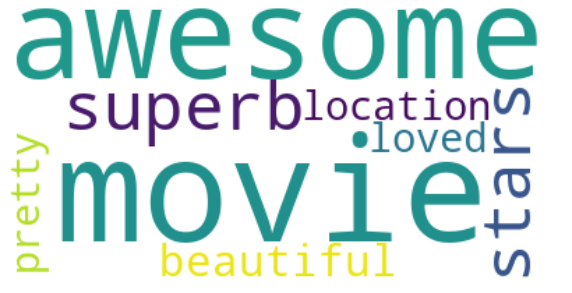

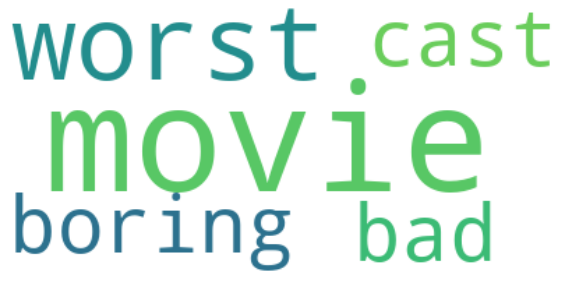

In [0]:
plt.figure(figsize = (10,10))
plt.axis('off')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(revPos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig("CE_ML_Project_11_02_WordCloud_Positive.jpeg")
plt.show()

plt.figure(figsize = (10,10))
plt.axis('off')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(revNeg)
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig("CE_ML_Project_11_03_WordCloud_Negative.jpeg")
plt.show()

In [0]:
rev2 = revPos.split()
rev3 = [ dict_w2n.get(w)+3 for w in rev2] # +3 shifts indexes
rev4 = [0] * (500 - len(rev3) - 1) + [1] + rev3 
#print(rev4)
rev5 = np.array(rev4).reshape(1, -1)
print(ReviewType(model.predict(rev5)[0][0]))
#print("Positive review: " , model.predict(rev5))

rev2 = revNeg.split()
rev3 = [ dict_w2n.get(w)+3 for w in rev2] # +3 shifts indexes
rev4 = [0] * (500 - len(rev3) - 1) + [1] + rev3 
#print(rev4)
rev5 = np.array(rev4).reshape(1, -1)
print(ReviewType(model.predict(rev5)[0][0]))

Positive review
Negative review
